# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [29]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [30]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [31]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [32]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
grouped_data = to_data.groupby(['year']).sum().copy()

In [33]:
type(grouped_data.loc[2001,:])
data01 = grouped_data.loc[2001,:].to_frame().drop(['average_house_value']).copy()
data06 = grouped_data.loc[2006,:].to_frame().drop(['average_house_value']).copy()
data11 = grouped_data.loc[2011,:].to_frame().drop(['average_house_value']).copy()
data16 = grouped_data.loc[2016,:].to_frame().drop(['average_house_value']).copy()

data01

,2001
single_detached_house,300930
apartment_five_storeys_plus,355015
movable_dwelling,75
semi_detached_house,90995
row_house,52355
duplex,23785
apartment_five_storeys_less,116900
other_house,3040
shelter_costs_owned,118563
shelter_costs_rented,152031


In [34]:
# Save the dataframe as a csv file
# YOUR CODE HERE!

In [35]:
# Helper create_bar_chart function
def create_bar_chart(data,title,xlabel,ylabel):
    data_plot = data.plot(kind="bar", title=title, xlabel=xlabel, ylabel=ylabel)
    return data_plot
    

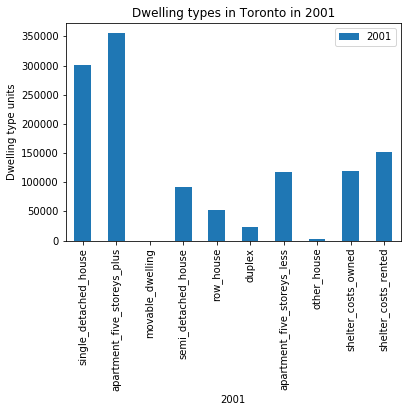

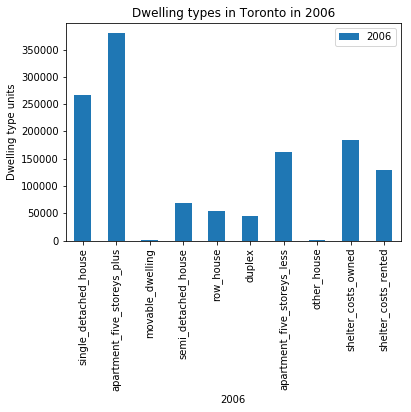

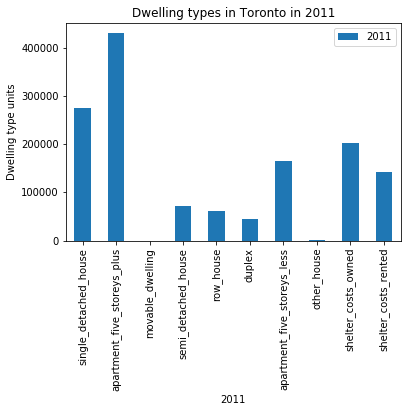

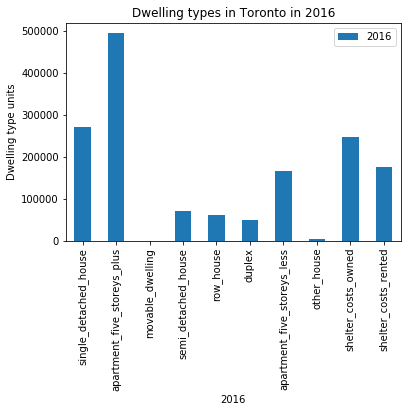

In [36]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
create_bar_chart(data=data01, title="Dwelling types in Toronto in 2001", xlabel="2001", ylabel="Dwelling type units")

# Bar chart for 2006
create_bar_chart(data=data06, title="Dwelling types in Toronto in 2006", xlabel="2006", ylabel="Dwelling type units")

# Bar chart for 2011
create_bar_chart(data=data11, title="Dwelling types in Toronto in 2011", xlabel="2011", ylabel="Dwelling type units")

# Bar chart for 2016
create_bar_chart(data=data16, title="Dwelling types in Toronto in 2016", xlabel="2016", ylabel="Dwelling type units")

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [37]:
# Calculate the average monthly shelter costs for owned and rented dwellings
monthlyShelterCost = to_data[['shelter_costs_owned','shelter_costs_rented']].copy()
monthlyShelterCost.reset_index()
monthlyShelterCost=monthlyShelterCost.groupby(['year']).mean().copy()
monthlyShelterCost


,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [38]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel):
    data_plot = data.plot.line(title=title, xlabel=xlabel, ylabel=ylabel)
    return data_plot

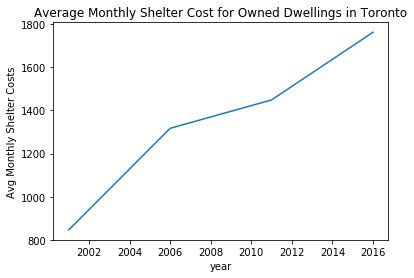

In [39]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(monthlyShelterCost['shelter_costs_owned'], title='Average Monthly Shelter Cost for Owned Dwellings in Toronto', xlabel='year', ylabel='Avg Monthly Shelter Costs')


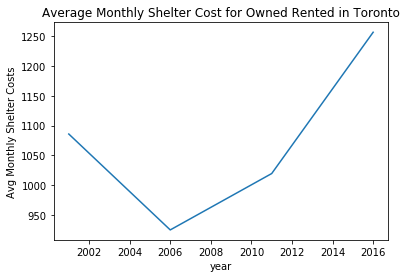

In [40]:
# Line chart for rented dwellings
create_line_chart(monthlyShelterCost['shelter_costs_rented'], title='Average Monthly Shelter Cost for Owned Rented in Toronto', xlabel='year', ylabel='Avg Monthly Shelter Costs')

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [41]:
average_house_value = to_data[['average_house_value']].copy()
average_house_value.reset_index()
average_house_value = average_house_value.groupby(['year']).mean().copy()

In [42]:
# Calculate the average house value per year


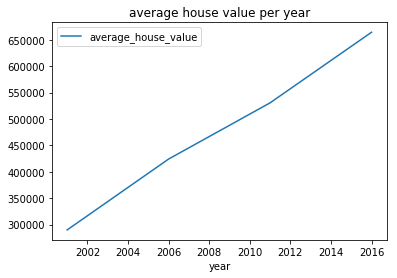

In [43]:
# Plot the average house value per year as a line chart
average_house_value.plot.line(title = 'average house value per year')

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

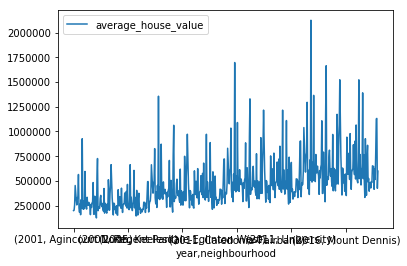

In [44]:
# Create a new DataFrame with the mean house values by neighbourhood per year
neighbourhoodData = to_data[['neighbourhood','average_house_value']].copy()
neighbourhoodData.reset_index()
neighbourhoodData= neighbourhoodData.groupby(['year','neighbourhood']).mean().copy()
neighbourhoodData.reset_index()

neighbourhoodData.plot.line()

In [45]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
neighbourhoodData.hvplot.line(x='year', y='average_house_value', width=600, 
                         groupby='neighbourhood')

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [46]:
# Fetch the data of all dwelling types per year
numDwellingTypes = to_data.copy()
numDwellingTypes=numDwellingTypes.groupby(['year','neighbourhood']).mean().copy()
numDwellingTypes

single_detached_house  \
year neighbourhood                                         
2001 Agincourt North                              3715.0   
     Agincourt South-Malvern West                 3250.0   
     Alderwood                                    3175.0   
     Annex                                        1060.0   
     Banbury-Don Mills                            3615.0   
...                                                  ...   
2016 Wychwood                                      920.0   
     Yonge-Eglinton                               1400.0   
     Yonge-St.Clair                                520.0   
     York University Heights                      1235.0   
     Yorkdale-Glen Park                           2165.0   

                                   apartment_five_storeys_plus  \
year neighbourhood                                               
2001 Agincourt North                                    1480.0   
     Agincourt South-Malvern West                       1835.0   
     Alderwood                                           315.0   
     Annex                                              6090.0   
     Banbury-Don Mills                                  4465.0   
...                                                        ...   
2016 Wychwood                                           1295.0   
     Yonge-Eglinton                                     1995.0   
     Yonge-St.Clair                                     4315.0   
     York University Heights                            5505.0   
     Yorkdale-Glen Park                                 1185.0   

                                   movable_dwelling  semi_detached_house  \
year neighbourhood                                                         
2001 Agincourt North                            0.0               1055.0   
     Agincourt South-Malvern West               0.0                545.0   
     Alderwood                                  0.0                470.0   
     Annex                                      5.0               1980.0   
     Banbury-Don Mills                          0.0                240.0   
...                                             ...                  ...   
2016 Wychwood                                   0.0                880.0   
     Yonge-Eglinton                             0.0                465.0   
     Yonge-St.Clair                             0.0                450.0   
     York University Heights                    0.0               1360.0   
     Yorkdale-Glen Park                         0.0                 80.0   

                                   row_house  duplex  \
year neighbourhood                                     
2001 Agincourt North                  1295.0   195.0   
     Agincourt South-Malvern West      455.0   105.0   
     Alderwood                          50.0   185.0   
     Annex                             605.0   275.0   
     Banbury-Don Mills                 380.0    15.0   
...                                      ...     ...   
2016 Wychwood                          290.0   395.0   
     Yonge-Eglinton                     60.0   310.0   
     Yonge-St.Clair                    220.0   130.0   
     York University Heights           775.0   280.0   
     Yorkdale-Glen Park                600.0   465.0   

                                   apartment_five_storeys_less  other_house  \
year neighbourhood                                                            
2001 Agincourt North                                     185.0          5.0   
     Agincourt South-Malvern West                        425.0          0.0   
     Alderwood                                           370.0          0.0   
     Annex                                              3710.0        165.0   
     Banbury-Don Mills                                  1360.0          0.0   
...                                                        ...          ...   
2016 Wychwood                                

In [47]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
numDwellingTypes.hvplot.bar(stacked = False, x='year', y='average_house_value', width=600, groupby='neighbourhood')
#couldn't get this one

:DynamicMap   [neighbourhood]
   :Bars   [year]   (average_house_value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [48]:
# Getting the data from the top 10 expensive neighbourhoods
expHoods = to_data[['neighbourhood','average_house_value']].copy()
expHoods = expHoods.groupby(['neighbourhood']).mean()
expHoods = expHoods.sort_values(by='average_house_value', ascending=False)
top10 = expHoods.head(10)
top10

,average_house_value
neighbourhood,
Bridle Path-Sunnybrook-York Mills,1526485.75
Forest Hill South,1195992.50
Lawrence Park South,1094027.75
Rosedale-Moore Park,1093640.00
St.Andrew-Windfields,999107.00
Casa Loma,981064.25
Bedford Park-Nortown,930415.25
Forest Hill North,851680.50
Kingsway South,843234.25


In [49]:
# Plotting the data from the top 10 expensive neighbourhoods
top10.hvplot.bar(x="neighbourhood",y="average_house_value",title="top 10 expensive neighbourhoods")

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [50]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()
df_neighbourhood_locations.set_index('neighbourhood')

,lat,lon
neighbourhood,,
Agincourt North,43.805441,-79.266712
Agincourt South-Malvern West,43.788658,-79.265612
Alderwood,43.604937,-79.541611
Annex,43.671585,-79.404001
Banbury-Don Mills,43.737657,-79.349718
...,...,...
Wychwood,43.676919,-79.425515
Yonge-Eglinton,43.704689,-79.403590
Yonge-St.Clair,43.687859,-79.397871


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [51]:
# Calculate the mean values for each neighborhood
meanHoods = to_data[['neighbourhood','average_house_value']].copy()
meanHoods = meanHoods.groupby(['neighbourhood']).mean()
meanHoods=meanHoods.reset_index()
meanHoods["lat"]=df_neighbourhood_locations['lat']
meanHoods["lon"]=df_neighbourhood_locations['lon']
meanHoods


,neighbourhood,average_house_value,lat,lon
0,Agincourt North,329811.50,43.805441,-79.266712
1,Agincourt South-Malvern West,334189.00,43.788658,-79.265612
2,Alderwood,427922.50,43.604937,-79.541611
3,Annex,746977.00,43.671585,-79.404001
4,Banbury-Don Mills,612039.00,43.737657,-79.349718
...,...,...,...,...
135,Wychwood,565976.50,43.676919,-79.425515
136,Yonge-Eglinton,809745.75,43.704689,-79.403590
137,Yonge-St.Clair,813220.25,43.687859,-79.397871
138,York University Heights,305899.50,43.765736,-79.488883


In [52]:
# Join the average values with the neighbourhood locations
# YOUR CODE HERE!

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

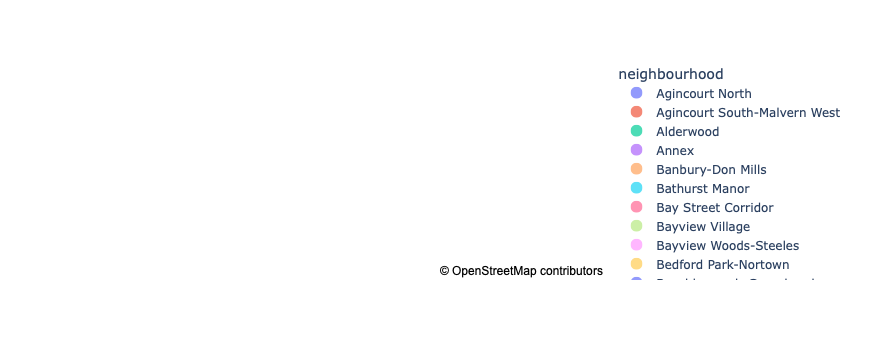

In [62]:
# Create a scatter mapbox to analyze neighbourhood info
map_plot = px.scatter_mapbox(
    meanHoods,
    lat="lat",
    lon="lon",
    size="average_house_value",
    mapbox_style = "open-street-map",
    color = "neighbourhood",
    zoom=4
)
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [54]:
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [27]:
# Fetch the data from all expensive neighbourhoods per year.
# YOUR CODE HERE!

In [28]:
# Create the sunburst chart
# YOUR CODE HERE!